In [2]:
import numpy as np
import scipy as sp

import matplotlib.pyplot as plt
from scipy.integrate import odeint
from numpy.linalg import inv

$\newcommand{\R}{\mathbb{R}}$
$\newcommand{\N}{\mathbb{N}}$

#  TP 4 : Schémas numériques  pour les EDO

L'objectif de ce TP est de mettre en oeuvre différents schémas numériques pour approcher la solution d'une équation différentielle ordinaire. Nous allons considérer différents schémas numériques, dont certains  nous n'avons pas encore vus en cours. L'objectif est de comprendre ce que c'est une solution approchée donnée par une méthode numérique, mais aussi de comprendre des notions comme l' erreur entre la solution exacte et la solution approchée, la  convergence d'une méthode numérique et l' ordre de précision d'une méthode numérique



Dans ce TP on considère des équations différentielles ordinaires, ou des systèmes d'équations différentielles ordinaires, de la forme
\begin{equation}
\label{EDO}
\left\{\begin{aligned}
  y'(t) & =  f(t,y(t)), \\
  y(t_0) & =  y_0,
\end{aligned} \right.
\tag{EDO}
\end{equation}

où $f$ : $I \times \R^n \longrightarrow \R^n$ est une
fonction dans les conditions du théorème de Cauchy-Lipschitz, avec $I\subseteq\R$ un intervalle ouvert de $\R$ et où $(t_0,y_0)\in I\times\R^n$ est donné. Le problème de Cauchy (EDO) admet alors une unique solution maximale définie dans un intervalle ouvert $J\subseteq I$.


On souhaite calculer une solution approchée de ce problème dans un intervalle de la forme $[t_0,t_f]=[t_0,t_0+T]\subseteq J$, avec $T>0$. Pour ce faire, on se donne $N\in\N$ et on considère une discrétisation de $[t_0,t_0+T]$ de pas $h=\frac TN,$ donnée par les points 
$$
t_0< t_1< \cdots <t_N=t_0+T,\ \ \ t_n=nh,\ n=0,\dots,N,
$$
et l'on utilise un schéma numérique afin de calculer une approximation $y^n$ de $y(t_n)$ pour $n=0,\dots,N$. 

Les schémas qui suivent sont fréquemment utilisés pour discrétiser le problème (EDO). On pose $y^0=y_0,\,$ et, pour $n=0,\dots,N-1,$ 



- **Euler explicite** :   $y^{n+1}=y^{n}+h f(t_n,y^{n})$ où   $f^{n}=f(t_n,y^{n})$ ;


- **Euler implicite** :   $y^{n+1}=y^{n}+h f(t_{n+1},y^{n+1})$ où $f^{n+1}=f(t_{n+1},y^{n+1})$ ;


-  **Heun** :  $y^{n+1}=y^{n}+\frac{h}{2}\big(f(t_n,y^{n})+f\big(t_n+h,y^{n}+h f(t_n,y^{n})\big)\big)$ où $p_1=f(t_n,y^{n})$ et $p_2=f(t_n+h,y^{n}+h p_1)$ ;


- **Crank-Nicolson** :  $y^{n+1}=y^{n}+\frac{h}{2}\big(f(t_{n},y^{n})+f(t_{n+1},y^{n+1})\big)$ où $f^{n}=f(t_{n},y^{n})$, $f^{n+1}=f(t_{n+1},y^{n+1})$ ;



- **Runge Kutta 4** :  $y^{n+1}=y^{n}+\frac{h}{6}(p_1+2p_2+2p_3+p_4)$ où $p_1=f(t_n,y^{n})$, $p_2=f(t_n+\frac{h}{2},y^{n}+\frac{h}{2} p_1)$, $p_3=f(t_n+\frac{h}{2},y^{n}+\frac{h}{2} p_2)$ et $p_4=f(t_n+h,y^{n}+h p_3)$.




### Exercice 1 : Méthodes implicites

On s'intéresse aux schémas de Euler implicite et de Crank-Nicolson.

 Considérons le problème 
$$
(P_1)\ \ \ \ 
\begin{cases}
\begin{cases}
x'=-y,\\
y'=x,
\end{cases}\\[4pt]
\ x(0)=1,\ \ y(0)=0, 
\end{cases}
$$
**Q1)** Sans déterminer la solution analytique de ce problème, montrer que sa trajectoire décrit un cercle, dont le centre est l'origine, dans le plan $(x,y)$.

*La trajectoire d'une solution $t\in J\mapsto(x(t),y(t))$ d'une EDO est la courbe
      $$
\{(x(t),y(t))\,|\,t\in J\}.
      $$*
      
**Q2)** Calculer les solutions approchées de $(P_1)$ données par le schéma d'Euler explicite, par le schéma d'Euler implicite et par le schéma de Crank-Nicolson, associées, à chaque fois, à des discrétisations de l'intervalle $[0,4 \pi]$ de 100, 200 et 400 points.

**Remarque :** dans le cas des schémas implicites (Euler implicite et Crank-Nicolson), il n'est pas possible de programmer une fonction à l'image des fonctions `Heun(fct, t0, tf, y0, h)` et `euler_exp(fct, t0, tf, y0, h)`. Comme le problème $(P_1)$ est linéaire, on peut expliciter la relation qui donne $(x^{n+1},y^{n+1})$ en fonction de $(x^n,y^n),$ pour les deux schémas. Dans le cas d'un problème non linéaire, l'explicitation des schémas implicites n'est pas toujours possible. Dans ce cas, pour programmer ces méthodes, il faut utiliser une méthode de résolution approchée d'équations non linéaires (comme par exemple la méthode de Newton) pour résoudre l'équation qui donne un terme en fonction du précédent.

In [60]:
def heun (fct,t0,tf,X0,h):
    t = np.arange(t0,tf+h,h)
    N = t.size
    l = len(X0)
    x=np.zeros((N,l))
    y=np.zeros((N,l))
    x[0,:]=X0[0]
    y[0,:]=X0[1]
    for n in range (N-1):
        xn1, yn1 = fct(t[n], x[n], y[n])
        xn2, yn2 = fct(t[n] + h, x[n]+ h*xn1, y[n]+h*yn1)
        x[n+1] = x[n]+(h/2)*(xn1 + xn2)
        y[n+1] = y[n]+(h/2)*(yn1 + yn2)
    return t,x,y

def euler_exp(fct, t0, tf, X0, h):
    t = np.arange(t0,tf+h,h)
    N = t.size
    l = len(X0)
    x=np.zeros((N,l))
    y=np.zeros((N,l))
    x[0,:]=X0[0]
    y[0,:]=X0[1]
    for n in range(N-1):
        xn,yn = fct(t[n],x[n],y[n])
        x[n+1]=x[n]+h*xn
        y[n+1]=y[n]+h*yn
    return t,x,y


def euler_imp(fct, t0, tf, X0, h):
    t = np.arange(t0,tf+h,h)
    N = t.size
    l = len(X0)
    x=np.zeros((N,l))
    y=np.zeros((N,l))
    x[0,:]=X0[0]
    y[0,:]=X0[1]
    for n in range(N-1):
        xn1,yn1 = fct(t[n+1],x[n+1],y[n+1])
        x[n+1]=x[n]+h*xn1
        y[n+1]=y[n]+h*yn1
    return t,x,y

def crank_nicolson(fct, rel, t0, tf, X0, h):
    t = np.arange(t0,tf+h,h)
    N = t.size
    l = len(X0)
    x=np.zeros((N,l))
    y=np.zeros((N,l))
    x[0,:]=X0[0]
    y[0,:]=X0[1]
    for n in range(N-1):
        xn, yn = fct(t[n], x[n], y[n])
        xr, yr = rel(t, x[n], y[n])
        xn1, yn1 = fct(t[n+1], xr, yr)
        x[n+1] = x[n]+(h/2)*(xn + xn1)
        y[n+1] = y[n]+(h/2)*(yn + yn1)
    return t,x,y


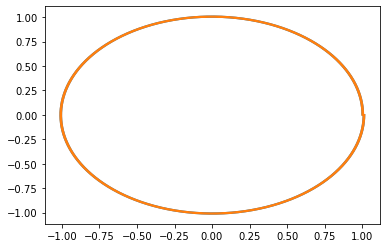

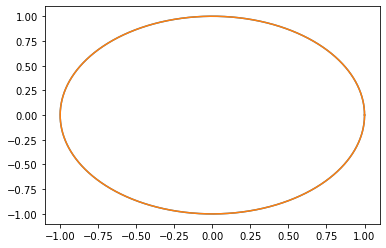

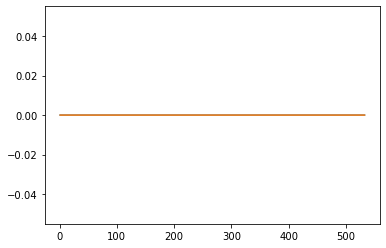

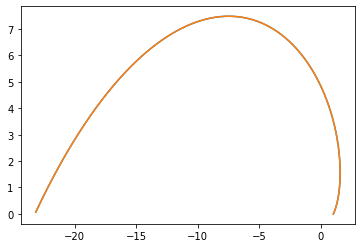

In [61]:
def f(t,xn,yn):
    xn1 = -yn
    yn1 = xn
    return(xn1,yn1)

def rel(t,xn,yn):
    xn1 = yn
    yn1 = -xn
    return(xn1,yn1)


t8, x8,y8 = euler_exp(f, 0,4*np.pi,[1,0],1/400)
plt.plot(x8,y8)
plt.show()

t9,x9,y9 = heun(f, 0,2*np.pi,[1,0],1/400)
plt.plot(x9,y9)
plt.show()

t10,x10,y10 = euler_imp(f, rel, 0,2*np.pi,[1,0],1/400)
plt.plot(x10,y10)
plt.show()

t11,x11,y11 = crank_nicolson(f, rel, 0,2*np.pi,[1,0],1/400)
plt.plot(x11,y11)
plt.show()

**Q3)** Dans une même figure, représenter dans le plan $(x,y)$ les trajectoires des solutions approchées obtenues avec chacune des trois méthodes. Qu'observe-t-on ? Décrivent-elles la même courbe que la solution exacte ? Caractériser analytiquement les trajectoires des solutions numériques obtenues avec chacune des méthodes. Pour ce faire étudier l'équation vérifiée par $(x^{n+1})^2+(y^{n+1})^2$.

In [6]:
# <completer>


**Q4)** Donner la solution analytique de $(P_1)$ et la comparer avec les solutions approchées.



In [7]:
# <completer>


### Exercice 2 : Méthodes d'ordre supérieur.

**Problèmes raides**

Nous nous intéressons ici au cas des problèmes *raides* suivants :

- Le problème
$$
(P_2)\ \ \ \ 
\begin{cases}
y'(t)  =   -100 y(t) + 10 t  + 1/10,  \\
y(0)  =   1/10,   
\end{cases}
$$
dont la solution exacte est donnée par
$$
y(t) = \frac{t+e^{-100 t}}{10}.
$$
On prendra l'intervalle $[0,0.5]$ et un pas $h=0.01$ dans les tests numériques.

- Le modèle de Van Der Pol 
$$
(P_3)\ \ \ \ 
\begin{cases}
y''(t)  =    (a-y(t)^2) y'(t) - y(t),\\
y(0)  =   \frac{1}{10},\ \ y'(0)  = 1,  
\end{cases}
$$
qui n'a pas de solution analytique, autrement dit dont la solution on ne sait pas calculer, même si elle existe (c'est une conséquence du théorème de Cauchy-Lipschitz). On prendra $a=5$ ou $a=8$, $[t_0,t_f] =[0, 20]$ dans les tests numériques.

**Remarque :** il n'est pas simple de définir ce que c'est une équation **raide**. Il s'agit d'équations dont les solutions présentent de grandes variations initiales ou de systèmes d'équations où les échelles de variation des différentes inconnues sont très différentes. Il s'agit d'équations qui sont en général difficiles d'approcher avec des schémas explicites d'ordre bas

**Q1)** À l'image de ce que vous avez fait pour les schémas d'Euler explicite et de Heun dans le TP3, écrire une fonction python de la forme `RK4(fct, t0, tf, y0, h)` pour le schéma de Runge-Kutta 4.

In [8]:
def RK4(fct,t0,tf,y0,h):
    


**Q2)** Testez les différents schémas explicites (Euler, Heun et RK4) sur le système $P_2$. Que constatez-vous ?

In [12]:
# <completer>


Afin de voir le comportement de ces schémas face à un problème plus raide que le précédent, on résout l'équation  de Van der Pol $(P_3)$. Il s'agit d'un problème non linéaire qui n'a pas de solution analytique, il doit alors être résolu numériquement. 

**Q3)** Écrivez $(P_3)$ sous la forme d'un syst\`eme différentiel de deux équations  d'ordre 1. 



**Q4)** Quels schémas donnent les meilleurs résultats lorsque l'on prend $a=8$, $t \in [0, 20]$ et $h=0.1,\, 0.05,\, 0.025$ ? Tester tous les schémas explicites proposés.

In [18]:
# <completer>


**Q5)** Recommencez avec \(a=5\).

In [19]:
# <completer>
